In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv("Zoo.csv")

In [15]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [16]:
df.shape

(101, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [18]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [19]:
df["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

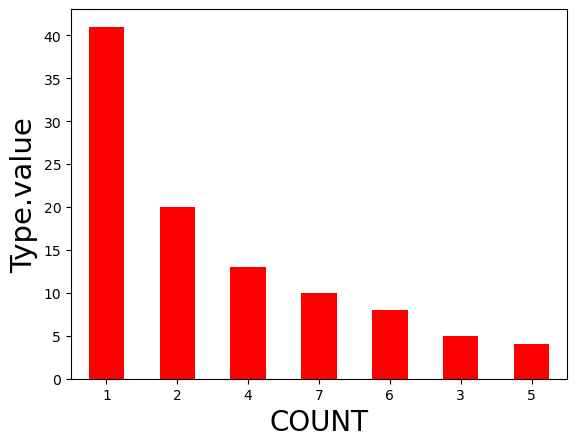

In [22]:
df.type.value_counts().plot(kind='bar',color="red")
plt.xlabel("COUNT",size=20)
plt.ylabel("Type.value",size=21)
plt.xticks(rotation='0')
plt.show()

In [23]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

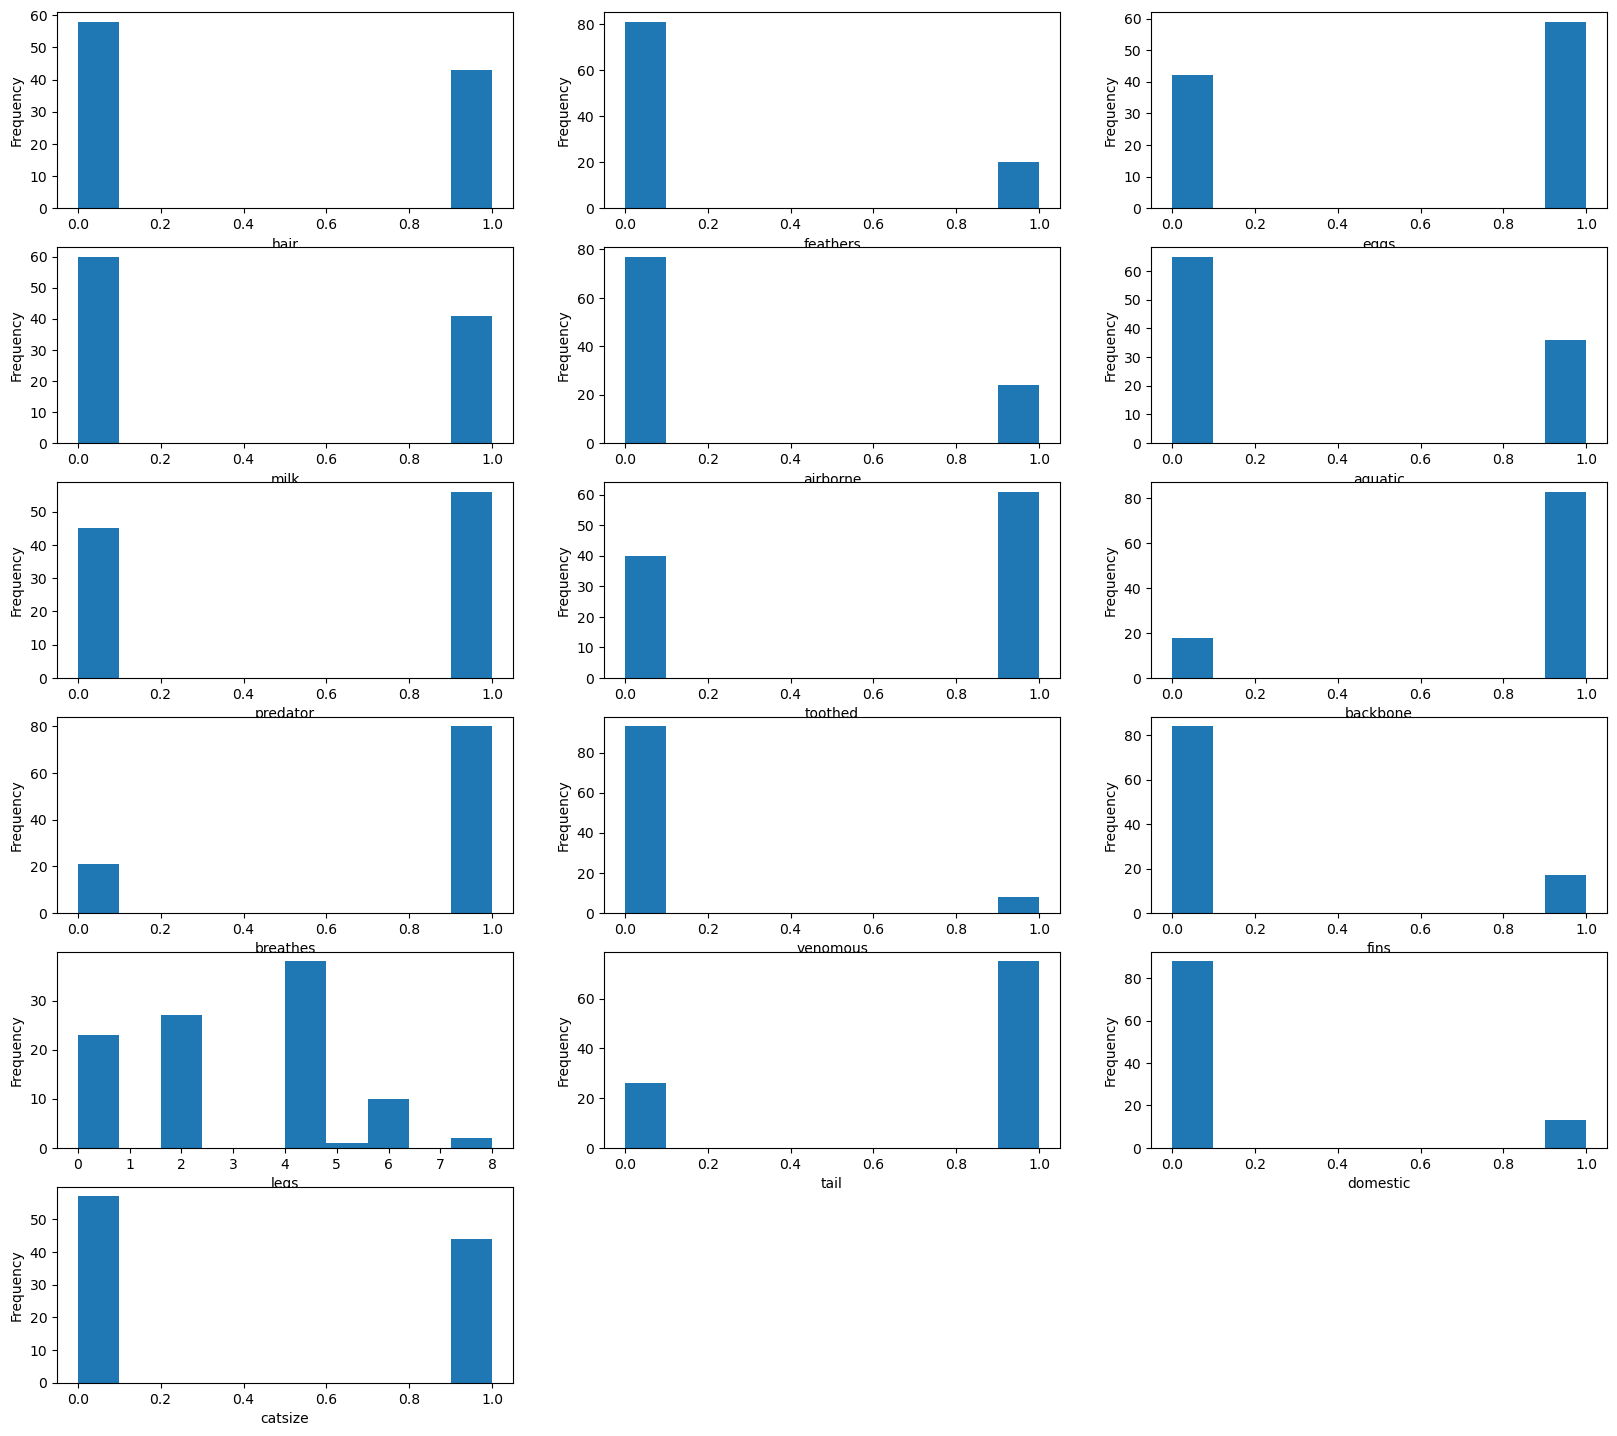

In [24]:
column=[ 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
fig=plt.figure(figsize=(20,30))
i=0
for column in column:
    sub=fig.add_subplot(10,3,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

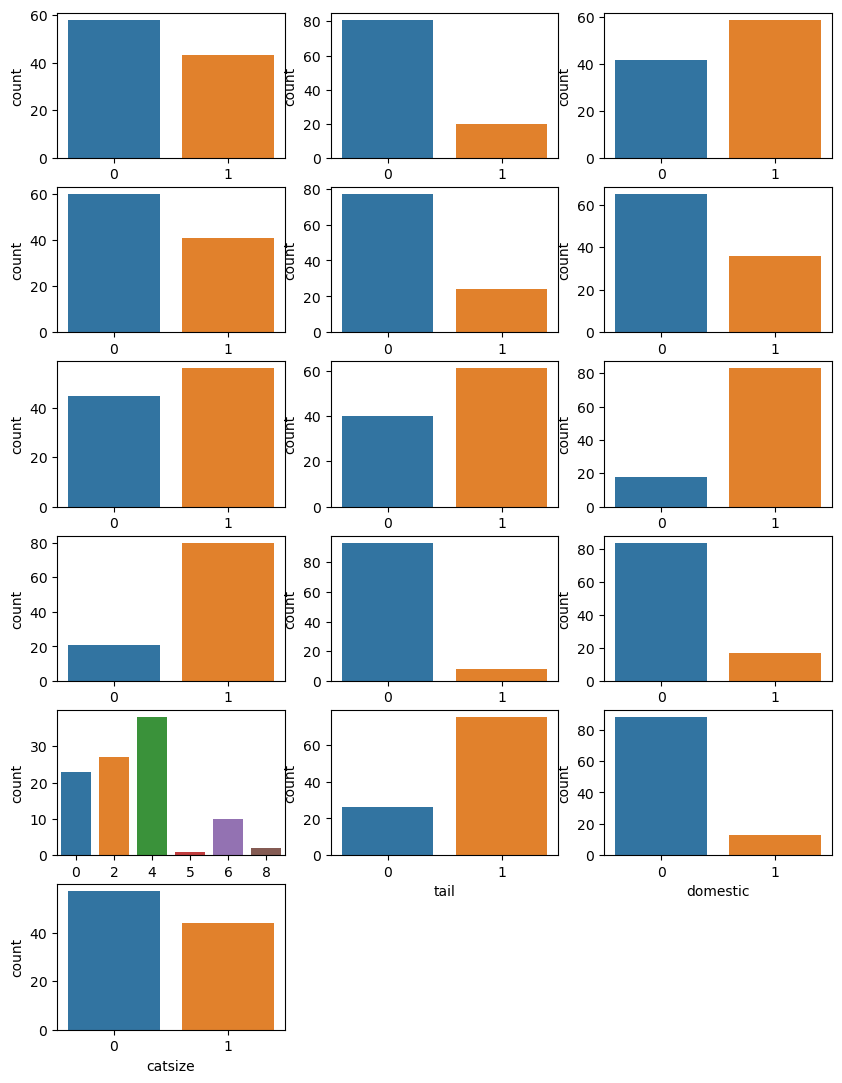

In [27]:
column1=[ 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
fig=plt.figure(figsize=(10,20))
for i in range(len(column1)):
    column=column1[i]
    sub=fig.add_subplot(9,3,i+1)
    chart=sns.countplot(data = df, x=column)

In [29]:
x=df.iloc[:,1:-1]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
y=df.iloc[:,-1]
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=20)

In [32]:
m=KNeighborsClassifier(n_neighbors=6)
m.fit(x_train,y_train)
predict=m.predict(x_test)
accuracy_score(predict,y_test)

0.8387096774193549

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.84        31
   macro avg       0.61      0.63      0.60        31
weighted avg       0.84      0.84      0.83        31



In [34]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       1.00      1.00      1.00         4
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         2

    accuracy                           0.81        31
   macro avg       0.52      0.65      0.57        31
weighted avg       0.73      0.81      0.76        31



In [36]:
n_neighbors=[2*i+1 for i in range(0,27)]
for n in n_neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy_score(y_test,pred)
    
    print(classification_report(y_test,pred),n)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31
 1
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy         

              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61        31
   macro avg       0.19      0.31      0.22        31
weighted avg       0.46      0.61      0.51        31
 33
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61        31
   macro avg       0

# visualizing the cv

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1  for i in range(0,25)]
k_scores = []
for k in k_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(Knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())
    print("k value=",k)
    m=KNeighborsClassifier(n_neighbors=k)
    m.fit(x_train,y_train)
    predict = m.predict(x_test)
    print(classification_report(y_test,predict))

k value= 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31

k value= 3
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

 

k value= 31
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61        31
   macro avg       0.19      0.31      0.22        31
weighted avg       0.46      0.61      0.51        31

k value= 33
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61        31

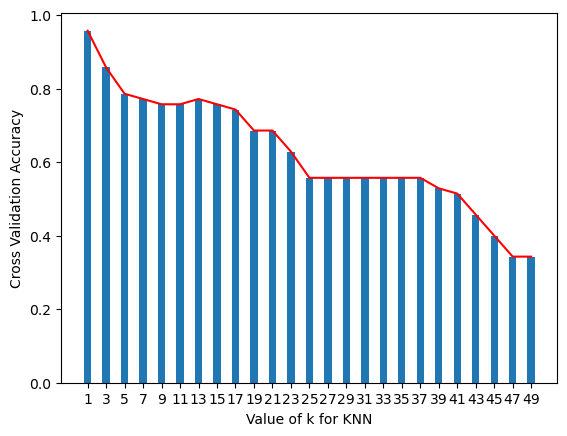

In [38]:
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color="red")
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [39]:
np.argmax(k_scores)

0

In [40]:
k_range[0]

1

In [41]:
m = KNeighborsClassifier(n_neighbors=1)
m.fit(x_train,y_train)
pred = m.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31

